<a href="https://colab.research.google.com/github/Moukthika1253/Facial_Expression_ImageClassifier/blob/main/facial_expression_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf

<Axes: >

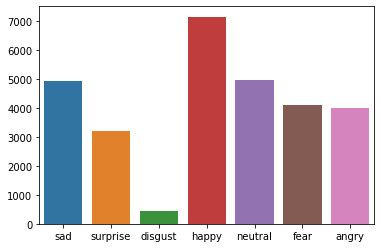

In [3]:
train_data="/content/images/train"
test_data="/content/images/validation"
train_count=[]
exp_list=[]
for emotion in os.listdir(train_data):
  exp_list.append(emotion)
  train_count.append(len(os.listdir(train_data+"/"+emotion)))
sns.barplot(x=exp_list,y=train_count)


<Axes: >

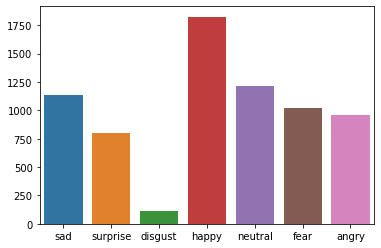

In [4]:
test_count=[]
for emotion in os.listdir(test_data):
  test_count.append(len(os.listdir(test_data+"/"+emotion)))
sns.barplot(x=exp_list,y=test_count)

**Face Expression images**

     sad            surprise            disgust            happy            neutral            fear            angry       

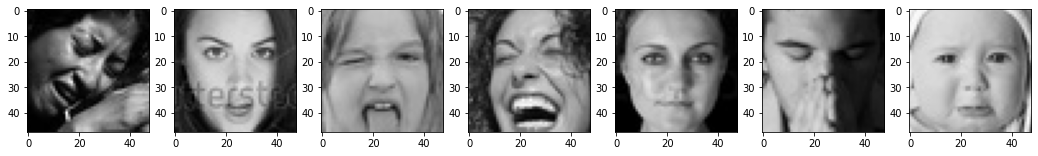

In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
i=0
_, axes = plt.subplots(1, 7, figsize=(18, 16))
axes = axes.flatten()
for emotion,a in zip(os.listdir(train_data),axes):
   images=image.load_img(train_data+"/"+emotion+"/"+os.listdir(train_data+"/"+emotion)[0])
   print("     "+exp_list[i],end="       ")
   a.imshow(images,cmap="gray")
   i=i+1
plt.show()



# **Image Generator**

In [92]:
from keras.preprocessing.image import ImageDataGenerator
data_train = ImageDataGenerator()
data_validation=ImageDataGenerator()
train_gen=data_train.flow_from_directory(train_data,target_size=(48,48),
                                                    color_mode="grayscale",
                                                    class_mode='categorical',
                                                    shuffle=True,seed=42)
validation_gen=data_validation.flow_from_directory(test_data,target_size=(48,48),
                                                    color_mode="grayscale",
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# **Building Convolutional Neural Networks (CNN)**

**Importing libraries to build CNN**

In [93]:
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D,Conv3D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import SGD,Adagrad,Adadelta,Adam
from keras.regularizers import l1,l2


**Model with 2 convolution layers and 2 fully connected layers optimizer=SGD activation = sigmoid**

In [8]:
model=Sequential()
#first convolution layer
model.add(Conv2D(32,(3,3),strides=(1,1),padding="same",input_shape=(48, 48,1),kernel_regularizer=l1(0.0001)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

#second convolution layer
model.add(Conv2D(64,(3,3),strides=(2,2),padding="same",kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())

#1st fully connected layer
model.add(Dense(512,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#2nd fully connected layer
model.add(Dense(1024,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#last layer
model.add(Dense(7))
model.add(Activation('softmax'))

#compiling model
opti=SGD(learning_rate=0.01)
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        1

**Training the model**

In [10]:
%%time
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

batch_size=150
history = model.fit(train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=50,
                                validation_data = validation_gen,
                                validation_steps = validation_gen.n//validation_gen.batch_size,
                                callbacks=callbacks_list)



Epoch 1/50
900/900 [==============================] - ETA: 0s - loss: 2.1257 - accuracy: 0.2147

900/900 [==============================] - 28s 20ms/step - loss: 2.1257 - accuracy: 0.2147 - val_loss: 1.8809 - val_accuracy: 0.3081
Epoch 2/50
900/900 [==============================] - ETA: 0s - loss: 2.0036 - accuracy: 0.2495

900/900 [==============================] - 17s 18ms/step - loss: 2.0036 - accuracy: 0.2495 - val_loss: 1.8435 - val_accuracy: 0.3352
Epoch 3/50
899/900 [============================>.] - ETA: 0s - loss: 1.9475 - accuracy: 0.2751

900/900 [==============================] - 19s 21ms/step - loss: 1.9475 - accuracy: 0.2751 - val_loss: 1.8314 - val_accuracy: 0.3477
Epoch 4/50
897/900 [============================>.] - ETA: 0s - loss: 1.9197 - accuracy: 0.2909

900/900 [==============================] - 16s 18ms/step - loss: 1.9198 - accuracy: 0.2908 - val_loss: 1.8275 - val_accuracy: 0.3599
Epoch 5/50
900/900 [==============================] - ETA: 0s - loss: 1.8941 - accuracy: 0.3041

900/900 [==============================] - 19s 21ms/step - loss: 1.8941 - accuracy: 0.3041 - val_loss: 1.8054 - val_accuracy: 0.3567
Epoch 6/50
897/900 [============================>.] - ETA: 0s - loss: 1.8747 - accuracy: 0.3126

900/900 [==============================] - 17s 18ms/step - loss: 1.8747 - accuracy: 0.3124 - val_loss: 1.7878 - val_accuracy: 0.3638
Epoch 7/50
900/900 [==============================] - ETA: 0s - loss: 1.8559 - accuracy: 0.3241

900/900 [==============================] - 16s 17ms/step - loss: 1.8559 - accuracy: 0.3241 - val_loss: 1.7511 - val_accuracy: 0.3874
Epoch 8/50
899/900 [============================>.] - ETA: 0s - loss: 1.8429 - accuracy: 0.3331

900/900 [==============================] - 17s 18ms/step - loss: 1.8429 - accuracy: 0.3332 - val_loss: 1.7489 - val_accuracy: 0.3749
Epoch 9/50
899/900 [============================>.] - ETA: 0s - loss: 1.8319 - accuracy: 0.3339

900/900 [==============================] - 16s 17ms/step - loss: 1.8321 - accuracy: 0.3339 - val_loss: 1.7202 - val_accuracy: 0.4021
Epoch 10/50
896/900 [============================>.] - ETA: 0s - loss: 1.8224 - accuracy: 0.3450

900/900 [==============================] - 16s 17ms/step - loss: 1.8223 - accuracy: 0.3454 - val_loss: 1.7184 - val_accuracy: 0.3884
Epoch 11/50
900/900 [==============================] - ETA: 0s - loss: 1.8125 - accuracy: 0.3473

900/900 [==============================] - 16s 17ms/step - loss: 1.8125 - accuracy: 0.3473 - val_loss: 1.7275 - val_accuracy: 0.3911
Epoch 12/50
898/900 [============================>.] - ETA: 0s - loss: 1.8021 - accuracy: 0.3516

900/900 [==============================] - 18s 20ms/step - loss: 1.8021 - accuracy: 0.3517 - val_loss: 1.7212 - val_accuracy: 0.4050
Epoch 13/50
900/900 [==============================] - ETA: 0s - loss: 1.7971 - accuracy: 0.3561

900/900 [==============================] - 16s 18ms/step - loss: 1.7971 - accuracy: 0.3561 - val_loss: 1.6965 - val_accuracy: 0.4058
Epoch 14/50
897/900 [============================>.] - ETA: 0s - loss: 1.7927 - accuracy: 0.3539

900/900 [==============================] - 16s 18ms/step - loss: 1.7927 - accuracy: 0.3540 - val_loss: 1.6943 - val_accuracy: 0.4078
Epoch 15/50
898/900 [============================>.] - ETA: 0s - loss: 1.7804 - accuracy: 0.3614

900/900 [==============================] - 16s 17ms/step - loss: 1.7800 - accuracy: 0.3616 - val_loss: 1.7269 - val_accuracy: 0.3994
Epoch 16/50
898/900 [============================>.] - ETA: 0s - loss: 1.7732 - accuracy: 0.3630

900/900 [==============================] - 16s 18ms/step - loss: 1.7728 - accuracy: 0.3632 - val_loss: 1.6737 - val_accuracy: 0.4121
Epoch 17/50
897/900 [============================>.] - ETA: 0s - loss: 1.7629 - accuracy: 0.3711

900/900 [==============================] - 19s 21ms/step - loss: 1.7634 - accuracy: 0.3711 - val_loss: 1.7101 - val_accuracy: 0.4092
Epoch 18/50
899/900 [============================>.] - ETA: 0s - loss: 1.7568 - accuracy: 0.3728

900/900 [==============================] - 16s 17ms/step - loss: 1.7567 - accuracy: 0.3729 - val_loss: 1.7223 - val_accuracy: 0.4014
Epoch 19/50
900/900 [==============================] - ETA: 0s - loss: 1.7536 - accuracy: 0.3725

900/900 [==============================] - 16s 18ms/step - loss: 1.7536 - accuracy: 0.3725 - val_loss: 1.6389 - val_accuracy: 0.4240
Epoch 20/50
897/900 [============================>.] - ETA: 0s - loss: 1.7499 - accuracy: 0.3763

900/900 [==============================] - 16s 18ms/step - loss: 1.7495 - accuracy: 0.3763 - val_loss: 1.6446 - val_accuracy: 0.4223
Epoch 21/50
899/900 [============================>.] - ETA: 0s - loss: 1.7426 - accuracy: 0.3789

900/900 [==============================] - 16s 18ms/step - loss: 1.7425 - accuracy: 0.3790 - val_loss: 1.7068 - val_accuracy: 0.4055
Epoch 22/50
900/900 [==============================] - ETA: 0s - loss: 1.7328 - accuracy: 0.3833

900/900 [==============================] - 16s 18ms/step - loss: 1.7328 - accuracy: 0.3833 - val_loss: 1.8460 - val_accuracy: 0.3203
Epoch 23/50
898/900 [============================>.] - ETA: 0s - loss: 1.7246 - accuracy: 0.3840

900/900 [==============================] - 19s 21ms/step - loss: 1.7246 - accuracy: 0.3841 - val_loss: 1.6143 - val_accuracy: 0.4342
Epoch 24/50
898/900 [============================>.] - ETA: 0s - loss: 1.7267 - accuracy: 0.3854

900/900 [==============================] - 16s 17ms/step - loss: 1.7267 - accuracy: 0.3853 - val_loss: 1.6486 - val_accuracy: 0.4232
Epoch 25/50
900/900 [==============================] - ETA: 0s - loss: 1.7128 - accuracy: 0.3866

900/900 [==============================] - 16s 18ms/step - loss: 1.7128 - accuracy: 0.3866 - val_loss: 1.6870 - val_accuracy: 0.4016
Epoch 26/50
900/900 [==============================] - ETA: 0s - loss: 1.7097 - accuracy: 0.3953

900/900 [==============================] - 17s 18ms/step - loss: 1.7097 - accuracy: 0.3953 - val_loss: 1.6836 - val_accuracy: 0.4220
Epoch 27/50
897/900 [============================>.] - ETA: 0s - loss: 1.7040 - accuracy: 0.3936

900/900 [==============================] - 16s 18ms/step - loss: 1.7043 - accuracy: 0.3935 - val_loss: 1.6325 - val_accuracy: 0.4313
Epoch 28/50
898/900 [============================>.] - ETA: 0s - loss: 1.6981 - accuracy: 0.3980

900/900 [==============================] - 16s 18ms/step - loss: 1.6977 - accuracy: 0.3982 - val_loss: 1.6152 - val_accuracy: 0.4276
Epoch 29/50
900/900 [==============================] - ETA: 0s - loss: 1.6962 - accuracy: 0.3939

900/900 [==============================] - 17s 18ms/step - loss: 1.6962 - accuracy: 0.3939 - val_loss: 1.5940 - val_accuracy: 0.4425
Epoch 30/50
899/900 [============================>.] - ETA: 0s - loss: 1.6948 - accuracy: 0.3984

900/900 [==============================] - 16s 17ms/step - loss: 1.6947 - accuracy: 0.3985 - val_loss: 1.5943 - val_accuracy: 0.4428
Epoch 31/50
898/900 [============================>.] - ETA: 0s - loss: 1.6852 - accuracy: 0.4022

900/900 [==============================] - 16s 18ms/step - loss: 1.6858 - accuracy: 0.4021 - val_loss: 1.6191 - val_accuracy: 0.4331
Epoch 32/50
900/900 [==============================] - ETA: 0s - loss: 1.6748 - accuracy: 0.4055

900/900 [==============================] - 16s 18ms/step - loss: 1.6748 - accuracy: 0.4055 - val_loss: 1.5990 - val_accuracy: 0.4388
Epoch 33/50
899/900 [============================>.] - ETA: 0s - loss: 1.6760 - accuracy: 0.4045

900/900 [==============================] - 16s 18ms/step - loss: 1.6763 - accuracy: 0.4043 - val_loss: 1.5768 - val_accuracy: 0.4506
Epoch 34/50
899/900 [============================>.] - ETA: 0s - loss: 1.6693 - accuracy: 0.4093

900/900 [==============================] - 16s 18ms/step - loss: 1.6693 - accuracy: 0.4094 - val_loss: 1.6703 - val_accuracy: 0.4142
Epoch 35/50
899/900 [============================>.] - ETA: 0s - loss: 1.6645 - accuracy: 0.4052

900/900 [==============================] - 16s 18ms/step - loss: 1.6646 - accuracy: 0.4053 - val_loss: 1.7122 - val_accuracy: 0.3980
Epoch 36/50
899/900 [============================>.] - ETA: 0s - loss: 1.6614 - accuracy: 0.4126

900/900 [==============================] - 16s 18ms/step - loss: 1.6616 - accuracy: 0.4125 - val_loss: 1.5966 - val_accuracy: 0.4349
Epoch 37/50
899/900 [============================>.] - ETA: 0s - loss: 1.6541 - accuracy: 0.4140

900/900 [==============================] - 16s 18ms/step - loss: 1.6542 - accuracy: 0.4139 - val_loss: 1.6621 - val_accuracy: 0.4236
Epoch 38/50
900/900 [==============================] - ETA: 0s - loss: 1.6474 - accuracy: 0.4175

900/900 [==============================] - 15s 17ms/step - loss: 1.6474 - accuracy: 0.4175 - val_loss: 1.5580 - val_accuracy: 0.4450
Epoch 39/50
899/900 [============================>.] - ETA: 0s - loss: 1.6408 - accuracy: 0.4180

900/900 [==============================] - 16s 17ms/step - loss: 1.6408 - accuracy: 0.4180 - val_loss: 1.5463 - val_accuracy: 0.4521
Epoch 40/50
898/900 [============================>.] - ETA: 0s - loss: 1.6412 - accuracy: 0.4199

900/900 [==============================] - 16s 18ms/step - loss: 1.6414 - accuracy: 0.4198 - val_loss: 1.5675 - val_accuracy: 0.4453
Epoch 41/50
898/900 [============================>.] - ETA: 0s - loss: 1.6366 - accuracy: 0.4215

900/900 [==============================] - 16s 18ms/step - loss: 1.6363 - accuracy: 0.4215 - val_loss: 1.5543 - val_accuracy: 0.4518
Epoch 42/50
900/900 [==============================] - ETA: 0s - loss: 1.6323 - accuracy: 0.4247

900/900 [==============================] - 16s 18ms/step - loss: 1.6323 - accuracy: 0.4247 - val_loss: 1.5505 - val_accuracy: 0.4543
Epoch 43/50
899/900 [============================>.] - ETA: 0s - loss: 1.6247 - accuracy: 0.4246

900/900 [==============================] - 16s 18ms/step - loss: 1.6245 - accuracy: 0.4246 - val_loss: 1.5309 - val_accuracy: 0.4601
Epoch 44/50
899/900 [============================>.] - ETA: 0s - loss: 1.6232 - accuracy: 0.4249

900/900 [==============================] - 16s 18ms/step - loss: 1.6231 - accuracy: 0.4250 - val_loss: 1.5448 - val_accuracy: 0.4588
Epoch 45/50
899/900 [============================>.] - ETA: 0s - loss: 1.6172 - accuracy: 0.4273

900/900 [==============================] - 16s 18ms/step - loss: 1.6170 - accuracy: 0.4274 - val_loss: 1.5626 - val_accuracy: 0.4536
Epoch 46/50
900/900 [==============================] - ETA: 0s - loss: 1.6100 - accuracy: 0.4306

900/900 [==============================] - 16s 18ms/step - loss: 1.6100 - accuracy: 0.4306 - val_loss: 1.5153 - val_accuracy: 0.4690
Epoch 47/50
898/900 [============================>.] - ETA: 0s - loss: 1.6031 - accuracy: 0.4354

900/900 [==============================] - 16s 18ms/step - loss: 1.6030 - accuracy: 0.4354 - val_loss: 1.5283 - val_accuracy: 0.4601
Epoch 48/50
897/900 [============================>.] - ETA: 0s - loss: 1.5968 - accuracy: 0.4337

900/900 [==============================] - 16s 17ms/step - loss: 1.5963 - accuracy: 0.4338 - val_loss: 1.5337 - val_accuracy: 0.4626
Epoch 49/50
899/900 [============================>.] - ETA: 0s - loss: 1.5938 - accuracy: 0.4375

900/900 [==============================] - 19s 21ms/step - loss: 1.5937 - accuracy: 0.4375 - val_loss: 1.5128 - val_accuracy: 0.4776
Epoch 50/50
898/900 [============================>.] - ETA: 0s - loss: 1.5852 - accuracy: 0.4437

900/900 [==============================] - 16s 18ms/step - loss: 1.5850 - accuracy: 0.4437 - val_loss: 1.5437 - val_accuracy: 0.4568
CPU times: user 16min 19s, sys: 1min 23s, total: 17min 42s
Wall time: 15min 42s


**Performance using SGD optimizer and Sigmoid activation function**

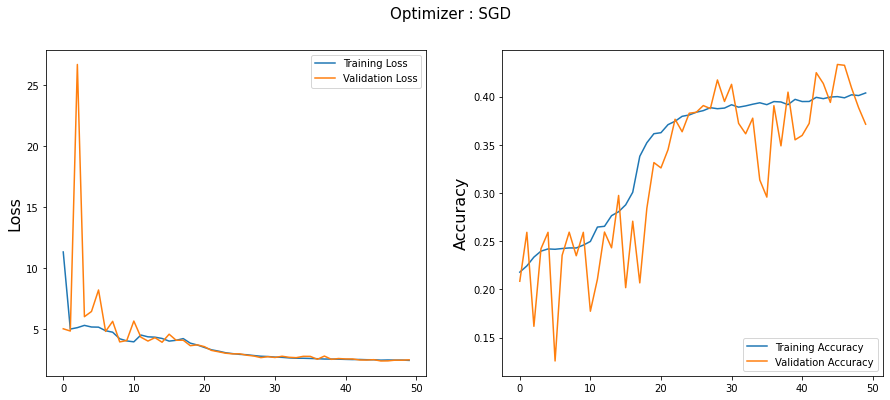

In [25]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : SGD', fontsize=15)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**CNN with 4 convolutional layers, 3 hidden layers optimizer=Adagrad activation=Relu**

In [13]:
model=Sequential()
#first convolution layer
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same",input_shape=(48, 48,1),kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

#second convolution layer
model.add(Conv2D(128,(3,3),strides=(1,1),padding="same",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

#third convolution layer
model.add(Conv2D(256,(3,3),strides=(2,2),padding="same",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

#fourth convolution layer
model.add(Conv2D(512,(3,3),strides=(2,2),padding="same",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

model.add(Flatten())

#1st fully connected layer
model.add(Dense(1024,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.27))

#2nd fully connected layer
model.add(Dense(512,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.27))

#2nd fully connected layer
model.add(Dense(256,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.27))


#last layer
model.add(Dense(7))
model.add(Activation('softmax'))

#compiling model
opti=Adagrad(learning_rate=0.01)
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)      

**Training the model**

In [15]:
%%time
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

batch_size=150
history = model.fit(train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=50,
                                validation_data = validation_gen,
                                validation_steps = validation_gen.n//validation_gen.batch_size,
                                callbacks=callbacks_list)

Epoch 1/50
898/900 [============================>.] - ETA: 0s - loss: 2.6890 - accuracy: 0.2425

900/900 [==============================] - 22s 22ms/step - loss: 2.6886 - accuracy: 0.2426 - val_loss: 2.5064 - val_accuracy: 0.3118
Epoch 2/50
897/900 [============================>.] - ETA: 0s - loss: 2.4470 - accuracy: 0.3273

900/900 [==============================] - 19s 21ms/step - loss: 2.4464 - accuracy: 0.3276 - val_loss: 2.2758 - val_accuracy: 0.3973
Epoch 3/50
899/900 [============================>.] - ETA: 0s - loss: 2.2955 - accuracy: 0.3720

900/900 [==============================] - 19s 21ms/step - loss: 2.2955 - accuracy: 0.3720 - val_loss: 2.1483 - val_accuracy: 0.4354
Epoch 4/50
900/900 [==============================] - ETA: 0s - loss: 2.1897 - accuracy: 0.3993

900/900 [==============================] - 20s 22ms/step - loss: 2.1897 - accuracy: 0.3993 - val_loss: 2.1255 - val_accuracy: 0.4303
Epoch 5/50
899/900 [============================>.] - ETA: 0s - loss: 2.0966 - accuracy: 0.4254

900/900 [==============================] - 20s 22ms/step - loss: 2.0969 - accuracy: 0.4253 - val_loss: 1.9774 - val_accuracy: 0.4666
Epoch 6/50
898/900 [============================>.] - ETA: 0s - loss: 2.0206 - accuracy: 0.4409

900/900 [==============================] - 19s 22ms/step - loss: 2.0208 - accuracy: 0.4410 - val_loss: 1.9020 - val_accuracy: 0.4805
Epoch 7/50
900/900 [==============================] - ETA: 0s - loss: 1.9538 - accuracy: 0.4601

900/900 [==============================] - 21s 24ms/step - loss: 1.9538 - accuracy: 0.4601 - val_loss: 2.0274 - val_accuracy: 0.4490
Epoch 8/50
897/900 [============================>.] - ETA: 0s - loss: 1.9046 - accuracy: 0.4701

900/900 [==============================] - 19s 21ms/step - loss: 1.9045 - accuracy: 0.4700 - val_loss: 1.7901 - val_accuracy: 0.5068
Epoch 9/50
900/900 [==============================] - ETA: 0s - loss: 1.8555 - accuracy: 0.4823

900/900 [==============================] - 20s 22ms/step - loss: 1.8555 - accuracy: 0.4823 - val_loss: 1.7543 - val_accuracy: 0.5088
Epoch 10/50
900/900 [==============================] - ETA: 0s - loss: 1.8086 - accuracy: 0.4905

900/900 [==============================] - 19s 21ms/step - loss: 1.8086 - accuracy: 0.4905 - val_loss: 1.7006 - val_accuracy: 0.5268
Epoch 11/50
899/900 [============================>.] - ETA: 0s - loss: 1.7633 - accuracy: 0.5021

900/900 [==============================] - 20s 22ms/step - loss: 1.7632 - accuracy: 0.5023 - val_loss: 1.6950 - val_accuracy: 0.5180
Epoch 12/50
899/900 [============================>.] - ETA: 0s - loss: 1.7318 - accuracy: 0.5076

900/900 [==============================] - 19s 21ms/step - loss: 1.7318 - accuracy: 0.5076 - val_loss: 1.7265 - val_accuracy: 0.5124
Epoch 13/50
898/900 [============================>.] - ETA: 0s - loss: 1.7025 - accuracy: 0.5150

900/900 [==============================] - 19s 21ms/step - loss: 1.7021 - accuracy: 0.5152 - val_loss: 1.6213 - val_accuracy: 0.5419
Epoch 14/50
898/900 [============================>.] - ETA: 0s - loss: 1.6726 - accuracy: 0.5216

900/900 [==============================] - 22s 24ms/step - loss: 1.6731 - accuracy: 0.5214 - val_loss: 1.6175 - val_accuracy: 0.5399
Epoch 15/50
899/900 [============================>.] - ETA: 0s - loss: 1.6388 - accuracy: 0.5302

900/900 [==============================] - 19s 21ms/step - loss: 1.6389 - accuracy: 0.5302 - val_loss: 1.6241 - val_accuracy: 0.5386
Epoch 16/50
899/900 [============================>.] - ETA: 0s - loss: 1.6161 - accuracy: 0.5357

900/900 [==============================] - 19s 21ms/step - loss: 1.6161 - accuracy: 0.5356 - val_loss: 1.5588 - val_accuracy: 0.5540
Epoch 17/50
900/900 [==============================] - ETA: 0s - loss: 1.5918 - accuracy: 0.5421

900/900 [==============================] - 22s 24ms/step - loss: 1.5918 - accuracy: 0.5421 - val_loss: 1.5338 - val_accuracy: 0.5716
Epoch 18/50
899/900 [============================>.] - ETA: 0s - loss: 1.5751 - accuracy: 0.5445

900/900 [==============================] - 19s 21ms/step - loss: 1.5749 - accuracy: 0.5445 - val_loss: 1.5237 - val_accuracy: 0.5672
Epoch 19/50
899/900 [============================>.] - ETA: 0s - loss: 1.5513 - accuracy: 0.5534

900/900 [==============================] - 20s 22ms/step - loss: 1.5514 - accuracy: 0.5533 - val_loss: 1.5188 - val_accuracy: 0.5713
Epoch 20/50
900/900 [==============================] - ETA: 0s - loss: 1.5363 - accuracy: 0.5546

900/900 [==============================] - 19s 22ms/step - loss: 1.5363 - accuracy: 0.5546 - val_loss: 1.4942 - val_accuracy: 0.5705
Epoch 21/50
898/900 [============================>.] - ETA: 0s - loss: 1.5164 - accuracy: 0.5571

900/900 [==============================] - 19s 21ms/step - loss: 1.5167 - accuracy: 0.5568 - val_loss: 1.5020 - val_accuracy: 0.5702
Epoch 22/50
898/900 [============================>.] - ETA: 0s - loss: 1.4985 - accuracy: 0.5645

900/900 [==============================] - 20s 22ms/step - loss: 1.4983 - accuracy: 0.5645 - val_loss: 1.4630 - val_accuracy: 0.5800
Epoch 23/50
899/900 [============================>.] - ETA: 0s - loss: 1.4821 - accuracy: 0.5670

900/900 [==============================] - 19s 21ms/step - loss: 1.4820 - accuracy: 0.5671 - val_loss: 1.4466 - val_accuracy: 0.5891
Epoch 24/50
899/900 [============================>.] - ETA: 0s - loss: 1.4689 - accuracy: 0.5716

900/900 [==============================] - 19s 22ms/step - loss: 1.4688 - accuracy: 0.5716 - val_loss: 1.5059 - val_accuracy: 0.5624
Epoch 25/50
898/900 [============================>.] - ETA: 0s - loss: 1.4526 - accuracy: 0.5757

900/900 [==============================] - 22s 25ms/step - loss: 1.4525 - accuracy: 0.5758 - val_loss: 1.4241 - val_accuracy: 0.5913
Epoch 26/50
899/900 [============================>.] - ETA: 0s - loss: 1.4400 - accuracy: 0.5812

900/900 [==============================] - 19s 21ms/step - loss: 1.4399 - accuracy: 0.5813 - val_loss: 1.5013 - val_accuracy: 0.5651
Epoch 27/50
899/900 [============================>.] - ETA: 0s - loss: 1.4109 - accuracy: 0.5916

900/900 [==============================] - 20s 22ms/step - loss: 1.4108 - accuracy: 0.5916 - val_loss: 1.5762 - val_accuracy: 0.5450
Epoch 28/50
897/900 [============================>.] - ETA: 0s - loss: 1.4101 - accuracy: 0.5873

900/900 [==============================] - 22s 24ms/step - loss: 1.4106 - accuracy: 0.5871 - val_loss: 1.4370 - val_accuracy: 0.5906
Epoch 29/50
899/900 [============================>.] - ETA: 0s - loss: 1.3963 - accuracy: 0.5946

900/900 [==============================] - 20s 22ms/step - loss: 1.3963 - accuracy: 0.5945 - val_loss: 1.4086 - val_accuracy: 0.5932
Epoch 30/50
899/900 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.5993

900/900 [==============================] - 19s 21ms/step - loss: 1.3824 - accuracy: 0.5993 - val_loss: 1.4268 - val_accuracy: 0.5895
Epoch 31/50
900/900 [==============================] - ETA: 0s - loss: 1.3719 - accuracy: 0.6003

900/900 [==============================] - 19s 21ms/step - loss: 1.3719 - accuracy: 0.6003 - val_loss: 1.3866 - val_accuracy: 0.6037
Epoch 32/50
899/900 [============================>.] - ETA: 0s - loss: 1.3593 - accuracy: 0.6047

900/900 [==============================] - 19s 22ms/step - loss: 1.3591 - accuracy: 0.6048 - val_loss: 1.3805 - val_accuracy: 0.6028
Epoch 33/50
900/900 [==============================] - ETA: 0s - loss: 1.3415 - accuracy: 0.6109

900/900 [==============================] - 19s 21ms/step - loss: 1.3415 - accuracy: 0.6109 - val_loss: 1.4336 - val_accuracy: 0.5865
Epoch 34/50
900/900 [==============================] - ETA: 0s - loss: 1.3386 - accuracy: 0.6122

900/900 [==============================] - 22s 25ms/step - loss: 1.3386 - accuracy: 0.6122 - val_loss: 1.3547 - val_accuracy: 0.6119
Epoch 35/50
898/900 [============================>.] - ETA: 0s - loss: 1.3269 - accuracy: 0.6160

900/900 [==============================] - 19s 21ms/step - loss: 1.3267 - accuracy: 0.6161 - val_loss: 1.4289 - val_accuracy: 0.5892
Epoch 36/50
900/900 [==============================] - ETA: 0s - loss: 1.3119 - accuracy: 0.6207

900/900 [==============================] - 19s 21ms/step - loss: 1.3119 - accuracy: 0.6207 - val_loss: 1.3832 - val_accuracy: 0.5997
Epoch 37/50
899/900 [============================>.] - ETA: 0s - loss: 1.2981 - accuracy: 0.6268

900/900 [==============================] - 22s 25ms/step - loss: 1.2982 - accuracy: 0.6267 - val_loss: 1.4050 - val_accuracy: 0.5994
Epoch 38/50
897/900 [============================>.] - ETA: 0s - loss: 1.2923 - accuracy: 0.6295

900/900 [==============================] - 19s 21ms/step - loss: 1.2929 - accuracy: 0.6294 - val_loss: 1.3708 - val_accuracy: 0.6070
Epoch 39/50
898/900 [============================>.] - ETA: 0s - loss: 1.2861 - accuracy: 0.6284

900/900 [==============================] - 20s 22ms/step - loss: 1.2860 - accuracy: 0.6285 - val_loss: 1.4383 - val_accuracy: 0.5905
Epoch 40/50
897/900 [============================>.] - ETA: 0s - loss: 1.2712 - accuracy: 0.6386

900/900 [==============================] - 19s 21ms/step - loss: 1.2711 - accuracy: 0.6384 - val_loss: 1.4123 - val_accuracy: 0.5996
Epoch 41/50
900/900 [==============================] - ETA: 0s - loss: 1.2687 - accuracy: 0.6373

900/900 [==============================] - 19s 21ms/step - loss: 1.2687 - accuracy: 0.6373 - val_loss: 1.3798 - val_accuracy: 0.6038
Epoch 42/50
899/900 [============================>.] - ETA: 0s - loss: 1.2518 - accuracy: 0.6430

900/900 [==============================] - 20s 22ms/step - loss: 1.2523 - accuracy: 0.6429 - val_loss: 1.3955 - val_accuracy: 0.6047
Epoch 43/50
899/900 [============================>.] - ETA: 0s - loss: 1.2409 - accuracy: 0.6486

900/900 [==============================] - 19s 21ms/step - loss: 1.2410 - accuracy: 0.6485 - val_loss: 1.4044 - val_accuracy: 0.6023
Epoch 44/50
897/900 [============================>.] - ETA: 0s - loss: 1.2362 - accuracy: 0.6516

900/900 [==============================] - 19s 21ms/step - loss: 1.2363 - accuracy: 0.6514 - val_loss: 1.3879 - val_accuracy: 0.6047
Epoch 45/50
900/900 [==============================] - ETA: 0s - loss: 1.2292 - accuracy: 0.6525

900/900 [==============================] - 22s 24ms/step - loss: 1.2292 - accuracy: 0.6525 - val_loss: 1.3706 - val_accuracy: 0.6145
Epoch 46/50
898/900 [============================>.] - ETA: 0s - loss: 1.2138 - accuracy: 0.6563

900/900 [==============================] - 19s 21ms/step - loss: 1.2134 - accuracy: 0.6563 - val_loss: 1.3500 - val_accuracy: 0.6212
Epoch 47/50
899/900 [============================>.] - ETA: 0s - loss: 1.2113 - accuracy: 0.6572

900/900 [==============================] - 19s 21ms/step - loss: 1.2114 - accuracy: 0.6572 - val_loss: 1.3727 - val_accuracy: 0.6161
Epoch 48/50
900/900 [==============================] - ETA: 0s - loss: 1.2055 - accuracy: 0.6625

900/900 [==============================] - 22s 24ms/step - loss: 1.2055 - accuracy: 0.6625 - val_loss: 1.3786 - val_accuracy: 0.6139
Epoch 49/50
898/900 [============================>.] - ETA: 0s - loss: 1.1968 - accuracy: 0.6627

900/900 [==============================] - 19s 21ms/step - loss: 1.1964 - accuracy: 0.6629 - val_loss: 1.3555 - val_accuracy: 0.6216
Epoch 50/50
899/900 [============================>.] - ETA: 0s - loss: 1.1844 - accuracy: 0.6717

900/900 [==============================] - 19s 21ms/step - loss: 1.1845 - accuracy: 0.6716 - val_loss: 1.3553 - val_accuracy: 0.6243
CPU times: user 21min 18s, sys: 1min 27s, total: 22min 46s
Wall time: 17min 52s


**Performance**

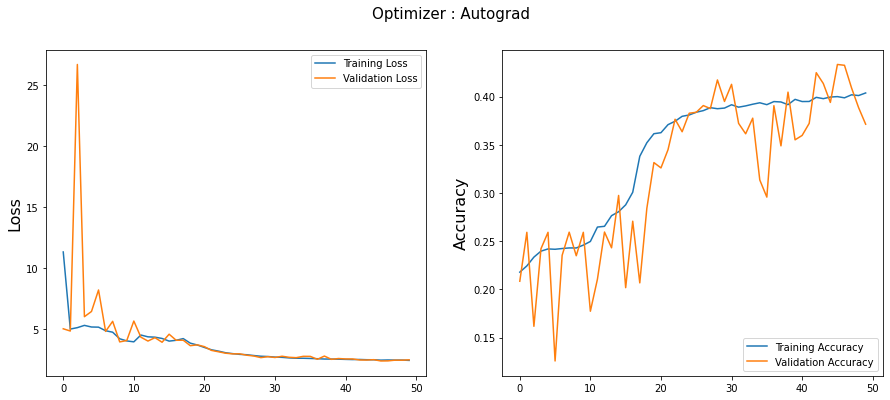

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Autograd', fontsize=15)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**CNN with 5 conolution layers, 3 hidden layers, optimizer=Adam, Activation=Relu**

In [94]:
model=Sequential()
#first convolution layer
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same",input_shape=(48, 48,1),kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.26))

#second convolution layer
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same",kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.26))

#third convolution layer
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same",kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.26))

#fourth convolution layer
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same",kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.26))

#fifth convolution layer
model.add(Conv2D(512,(3,3),strides=(2,2),padding="same",kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.26))

model.add(Flatten())

#1st fully connected layer
model.add(Dense(4096,kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.26))

#2nd fully connected layer
model.add(Dense(2048,kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.26))

#3rd fully connected layer
model.add(Dense(1024,kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.26))


#last layer
model.add(Dense(7))
model.add(Activation('softmax'))

#compiling model
opti=Adam(learning_rate=0.001)
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_19 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_28 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_65 (Conv2D)          (None, 24, 24, 256)     

**training model**

In [96]:
%%time
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

batch_size=150
history = model.fit(train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=50,
                                validation_data = validation_gen,
                                validation_steps = validation_gen.n//validation_gen.batch_size,
                                callbacks=callbacks_list)

Epoch 1/50
900/900 [==============================] - 32s 34ms/step - loss: 11.8491 - accuracy: 0.2171 - val_loss: 6.3468 - val_accuracy: 0.1446
Epoch 2/50
900/900 [==============================] - 30s 33ms/step - loss: 5.0548 - accuracy: 0.2266 - val_loss: 6.1817 - val_accuracy: 0.2330
Epoch 3/50
900/900 [==============================] - 30s 33ms/step - loss: 5.1452 - accuracy: 0.2325 - val_loss: 4.7765 - val_accuracy: 0.2489
Epoch 4/50
900/900 [==============================] - 30s 33ms/step - loss: 5.3062 - accuracy: 0.2375 - val_loss: 5.4075 - val_accuracy: 0.2589
Epoch 5/50
900/900 [==============================] - 30s 33ms/step - loss: 5.1205 - accuracy: 0.2425 - val_loss: 11.4590 - val_accuracy: 0.1872
Epoch 6/50
900/900 [==============================] - 31s 34ms/step - loss: 5.1327 - accuracy: 0.2433 - val_loss: 5.2517 - val_accuracy: 0.2595
Epoch 7/50
900/900 [==============================] - 30s 33ms/step - loss: 4.9778 - accuracy: 0.2446 - val_loss: 6.2925 - val_accurac

**Performance**

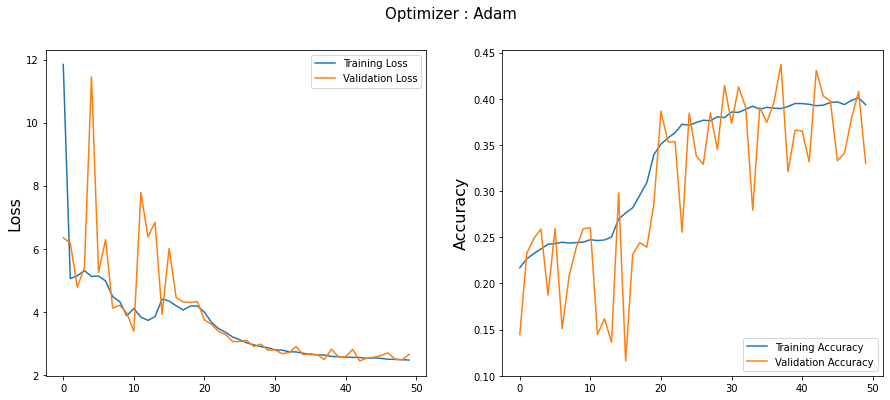

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=15)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**Training time comparsion**

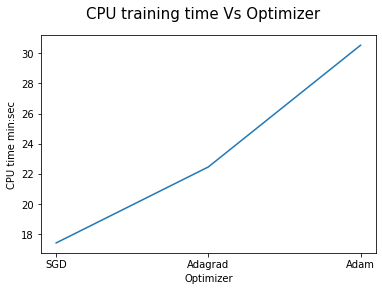

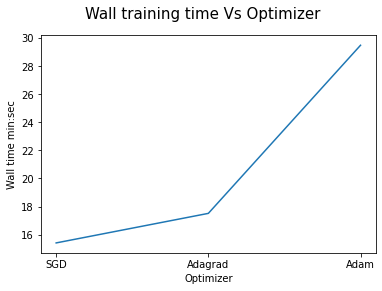

In [98]:
wall_time=[15.42,17.52,29.47]
cpu_time=[17.42,22.46,30.53]
opt=['SGD','Adagrad','Adam']

plt.suptitle('CPU training time Vs Optimizer',fontsize=15)
plt.xlabel('Optimizer', fontsize=10)
plt.ylabel('CPU time min:sec', fontsize=10)
plt.plot(opt,cpu_time)
plt.show()


plt.suptitle('Wall training time Vs Optimizer',fontsize=15)
plt.xlabel('Optimizer', fontsize=10)
plt.ylabel('Wall time min:sec', fontsize=10)
plt.plot(opt,wall_time)
plt.show()



# Model Predictions

In [99]:
model_json = model.to_json()
model.save_weights('model_weights.h5')
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [130]:
from tensorflow.keras.models import model_from_json
import numpy as np

import tensorflow as tf

class FacialExpressionModel(object):
    EMOTIONS_LIST = ["Angry", "Disgust",
                    "Fear", "Happy",
                    "Neutral", "Sad",
                    "Surprise"]
    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)
        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.make_predict_function()
    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]

In [131]:
import cv2

import numpy as np

facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = FacialExpressionModel("model.json", "model_weights.h5")
font = cv2.FONT_HERSHEY_SIMPLEX

class VideoCamera():
    def __init__(self):
        self.video = cv2.VideoCapture("/content/facial.mp4")

    def __del__(self):
        self.video.release()

    # returns camera frames along with bounding boxes and predictions
    def get_frame(self):
        _, fr = self.video.read()
        gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
        faces = facec.detectMultiScale(gray_fr, 1.3, 5)

        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]

            roi = cv2.resize(fc, (48, 48))
            pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])

            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)

        return fr



In [132]:
def gen(camera):
    while True:
        frame = camera.get_frame()
        cv2.imshow('Facial Expression Recognization',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

In [129]:
v=VideoCamera()
v.gen()

AttributeError: ignored

In [74]:
from deepface import DeepFace
face_analysis = DeepFace.analyze(img_path = "/content/images/validation/angry/10052.jpg",enforce_detection=False)

Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.70it/s]


In [75]:
print(int(face_analysis["dominant_emotion"]))

TypeError: ignored

In [76]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

In [77]:
img_path = '/content/images/validation/angry/10052.jpg'
img = image.load_img(img_path, grayscale=True, target_size=(48,48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

prediction = np.argmax(model.predict(x))
print('The predicted emotion is : ' + label_dict[prediction])
my_image = image.load_img(img_path)
plt.imshow(my_image)

AttributeError: ignored

In [84]:
from tensorflow.keras.models import model_from_json
class FacialExpressionModel(object):
    EMOTIONS_LIST = ["Angry", "Disgust",
                    "Fear", "Happy",
                    "Neutral", "Sad",
                    "Surprise"]
    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)
        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.predict(model_json_file)
    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]

In [85]:
import cv2
facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = FacialExpressionModel("model.json", "model_weights.h5")
font = cv2.FONT_HERSHEY_SIMPLEX
class VideoCamera(object):
    def __init__(self):
        self.video = cv2.VideoCapture(0)
    def __del__(self):
        self.video.release()
    # returns camera frames along with bounding boxes and predictions
    def get_frame(self):
        _, fr = self.video.read()
        gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
        faces = facec.detectMultiScale(gray_fr, 1.3, 5)
        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]
            roi = cv2.resize(fc, (48, 48))
            pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])
            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
        return fr

IndexError: ignored

In [50]:
def gen(camera):
    while True:
        frame = camera.get_frame()
        cv2.imshow('Facial Expression Recognization',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

In [51]:
gen(VideoCamera())

error: ignored